# Incoherent Irradiance

In [1]:
import optiland.backend as be
from optiland.optic import Optic
from optiland.materials import IdealMaterial
from optiland.physical_apertures import RectangularAperture
from optiland.analysis.irradiance import IncoherentIrradiance

In [ ]:
class InfraredTriplet(Optic):
    def __init__(self):
        super().__init__()

        germanium = IdealMaterial(n=4.002)
        ZnSe = IdealMaterial(n=2.4028)

        detector_aperture = RectangularAperture(
            x_min=-0.4, x_max=0.4, y_min=-0.4, y_max=0.4
        )

        self.add_surface(index=0, radius=be.inf, thickness=be.inf)
        self.add_surface(
            index=1,
            radius=10.4578,
            thickness=0.5901,
            material=germanium,
            is_stop=True,
        )
        self.add_surface(index=2, radius=14.1079, thickness=4.3909)
        self.add_surface(index=3, radius=-15.8842, thickness=0.59, material=ZnSe)
        self.add_surface(index=4, radius=-18.2105, thickness=5.6218)
        self.add_surface(index=5, radius=2.5319, thickness=0.3918, material=germanium)
        self.add_surface(index=6, radius=2.4308, thickness=2.5)  # purposely defocus

        # add detector aperture on image surface
        self.add_surface(index=7, aperture=detector_aperture)

        self.set_aperture(aperture_type="imageFNO", value=2)

        self.set_field_type(field_type="angle")
        self.add_field(y=0)

        self.add_wavelength(value=10.6, is_primary=True)

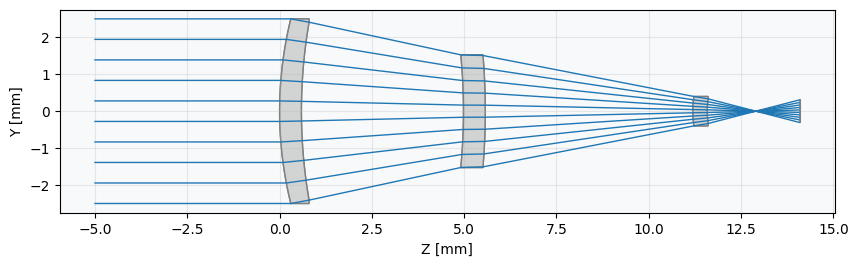

In [3]:
lens = InfraredTriplet()
lens.draw(num_rays=10)

In [4]:
irradiance = IncoherentIrradiance(
    lens,
    num_rays=1_000_000,  # 1 million rays
    detector_surface=-1,  # image surface
    distribution="random",
)

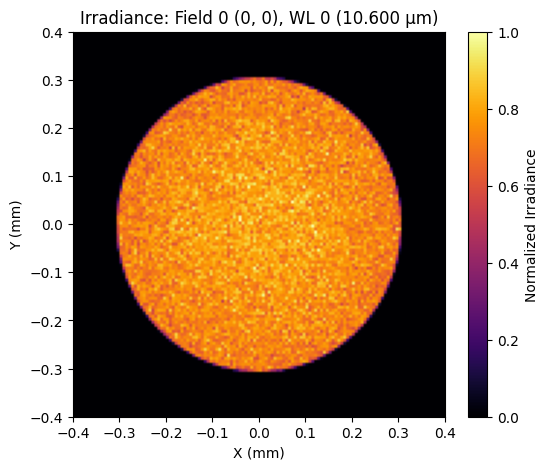

In [5]:
irradiance.view()